# Data overview

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Our Goal

Given data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. The "loan_status" column contains our label.

# Loading the dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [9]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# EDA

<AxesSubplot:xlabel='loan_status', ylabel='count'>

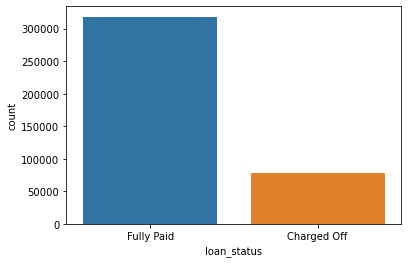

In [11]:
sns.countplot(x='loan_status', data=df)

The dataset is imbalanced

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

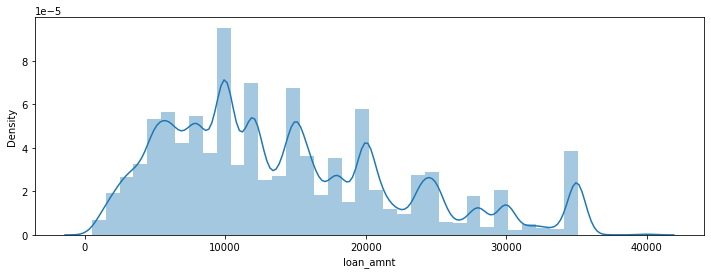

In [12]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],bins=40)

Loan amount is mostly between 10000 and 20000

In [13]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


<AxesSubplot:>

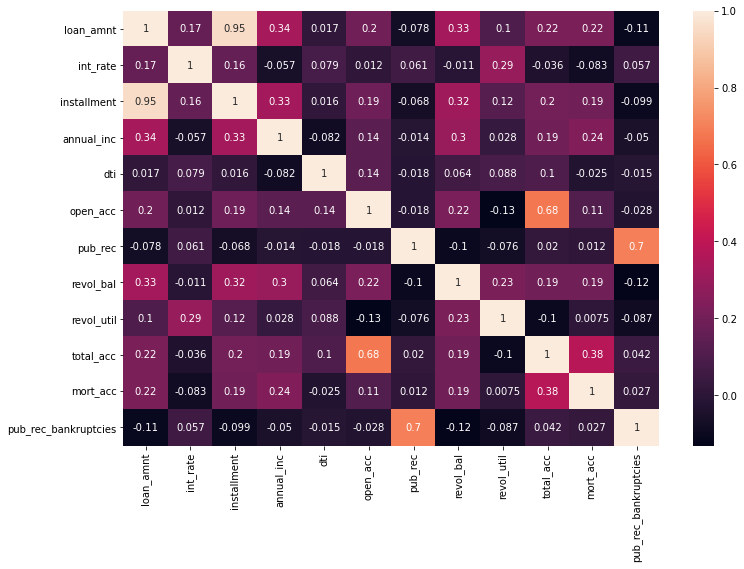

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

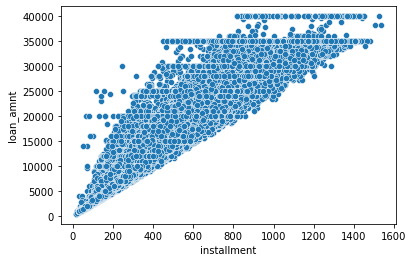

In [17]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

Loan amount and installment have high correlation between them, but we can't drop one of them

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

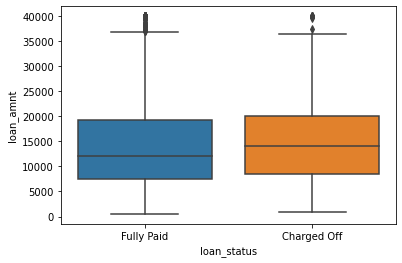

In [18]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [19]:
df.groupby(by='loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


There is not much difference in mean and std of loan amount whether it is fully paid or not

In [20]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [21]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

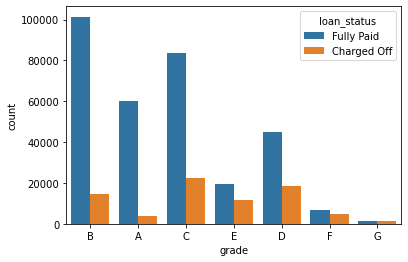

In [22]:
sns.countplot(x='grade', hue='loan_status', data=df)

More loan grades are there for fully paid loans

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

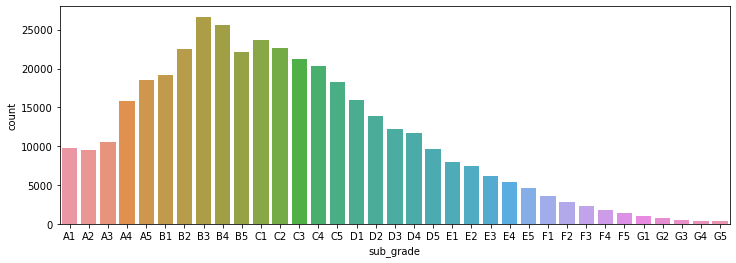

In [23]:
sub_grade_order = sorted(df['sub_grade'].unique())
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=df, order=sub_grade_order)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

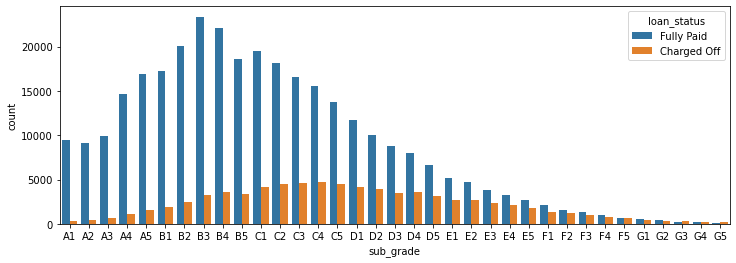

In [24]:
sub_grade_order = sorted(df['sub_grade'].unique())
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade_order)

More loan sub-grades are there for fully paid loans

In [25]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


##### The correlation of the numeric features to the new loan_repaid column:

<AxesSubplot:>

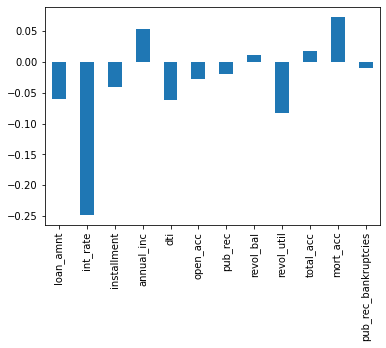

In [26]:
df.corr()['loan_repaid'].drop('loan_repaid').plot(kind='bar')

# Data PreProcessing

## Handling missing data

In [27]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [28]:
df.isnull().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [29]:
df['emp_title'].nunique()

173105

In [30]:
df['emp_title'].value_counts()

Teacher                         4389
Manager                         4250
Registered Nurse                1856
RN                              1846
Supervisor                      1830
                                ... 
Bob Evans Farms, Inc.              1
Hoffmann Tool & Die                1
Service Availability Manager       1
Pest tech                          1
Product Advisor/Specialist         1
Name: emp_title, Length: 173105, dtype: int64

Realistically there are too many unique job titles to convert this to dummy variables feature. We will remove that column.

In [31]:
df = df.drop('emp_title', axis=1)

In [32]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

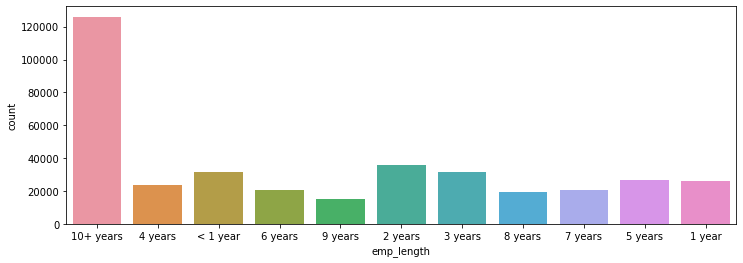

In [33]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df)

Most of the employment lengths are more than 10 years.

In [34]:
emp_charged_off = df[df['loan_status']=="Charged Off"].groupby(by='emp_length').count()['loan_status']

In [35]:
emp_fully_paid = df[df['loan_status']=="Fully Paid"].groupby(by='emp_length').count()['loan_status']

<AxesSubplot:xlabel='emp_length'>

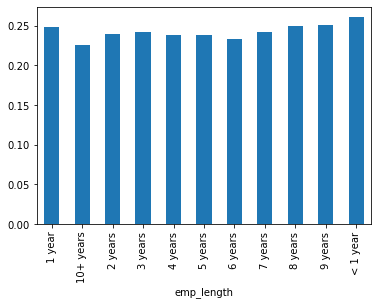

In [36]:
(emp_charged_off / emp_fully_paid).plot(kind='bar')

Charge off rates are extremely similar across all employment lengths. We will drop the emp_length column.

In [37]:
df = df.drop('emp_length', axis=1)

In [38]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [39]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

The title column is simply a string subcategory/description of the purpose column. We will drop the title column.

In [40]:
df = df.drop('title', axis=1)

In [41]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [42]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

**The total_acc feature correlates with the mort_acc. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.**

In [43]:
avg_mort_acc = df.groupby(by='total_acc').mean()['mort_acc']

In [44]:
avg_mort_acc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

We will fill in the missing mort_acc values based on their total_acc value.

In [45]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return avg_mort_acc[total_acc]
    else:
        return mort_acc

In [46]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [47]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. So we will drop these columns.

In [48]:
df = df.dropna()

In [49]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

In [51]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

We will convert the term column into numerical

In [52]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [53]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

In [54]:
df['term'].unique()

array([36, 60])

**Converting the categorical columns into dummy variables:**

In [55]:
subgrade = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df.drop('sub_grade', axis=1), subgrade], axis=1)

In [56]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [57]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

We will convert home_ownership to dummy variables, by replacing NONE and ANY with OTHER.

In [58]:
df['home_ownership'] = df['home_ownership'].replace({'NONE':'OTHER', 'ANY':'OTHER'})

In [59]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [60]:
ownership = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership', axis=1), ownership], axis=1)

We eill feature engineer a zip code column from the address in the data set.

In [61]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [62]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

In [63]:
df['zip_code'].nunique()

10

In [64]:
zip_code = pd.get_dummies(df['zip_code'], drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,zip_code],axis=1)

issue_d is the month which the loan was funded that means it indirectly tells whether or not a loan would be issued. It leads to data leakage so we will drop it

In [65]:
df = df.drop('issue_d',axis=1)

We will extract the year from the earliest_cr_line feature.

In [66]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [67]:
df = df.drop('earliest_cr_line',axis=1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   grade                                395219 non-null  object 
 5   annual_inc                           395219 non-null  float64
 6   loan_status                          395219 non-null  object 
 7   dti                                  395219 non-null  float64
 8   open_acc                             395219 non-null  float64
 9   pub_rec                              395219 non-null  float64
 10  revol_bal                            395219 non-null  float64
 11  revol_util   

Grade is a sub_set of subgrade. So we can drop that column

In [69]:
df = df.drop('grade', axis=1)

We will drop the load_status column, since its a duplicate of the loan_repaid column we created earlier.

In [71]:
df = df.drop('loan_status', axis=1)

# Handling outliers

In [79]:
df.shape

(395219, 79)

In [80]:
Q1 = np.percentile(df['loan_amnt'],25)
Q3 = np.percentile(df['loan_amnt'],75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [81]:
df = df[(df['loan_amnt']>lower_limit) & (df['loan_amnt']<upper_limit)]

In [82]:
df.shape

(395026, 79)

## Train-test split

In [83]:
X = df.drop('loan_repaid', axis=1)
y = df['loan_repaid']

In [1]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [85]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,1,0,0,0,0,0,0,0,1999


## Normalizing the Data

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler = MinMaxScaler()

In [88]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [157]:
model = Sequential()

model.add(Dense(156, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(78, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(39, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(19, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [158]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [159]:
model.fit(x=X_train,  y=y_train,  epochs=50, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/50
2469/2469 [==============================] - 8s 3ms/step - loss: 0.3754 - accuracy: 0.8478 - val_loss: 0.2648 - val_accuracy: 0.8886
Epoch 2/50
2469/2469 [==============================] - 7s 3ms/step - loss: 0.2720 - accuracy: 0.8865 - val_loss: 0.2640 - val_accuracy: 0.8886
Epoch 3/50
2469/2469 [==============================] - 7s 3ms/step - loss: 0.2658 - accuracy: 0.8883 - val_loss: 0.2626 - val_accuracy: 0.8886
Epoch 4/50
2469/2469 [==============================] - 7s 3ms/step - loss: 0.2642 - accuracy: 0.8883 - val_loss: 0.2628 - val_accuracy: 0.8886
Epoch 5/50
2469/2469 [==============================] - 7s 3ms/step - loss: 0.2652 - accuracy: 0.8873 - val_loss: 0.2619 - val_accuracy: 0.8886
Epoch 6/50
2469/2469 [==============================] - 7s 3ms/step - loss: 0.2632 - accuracy: 0.8880 - val_loss: 0.2613 - val_accuracy: 0.8886
Epoch 7/50
2469/2469 [==============================] - 7s 3ms/step - loss: 0.2638 - accuracy: 0.8873 - val_loss: 0.2609 - val_accuracy:

# Evaluating Model Performance

In [160]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.312820,0.874916,0.264763,0.888616
1,0.269155,0.887434,0.264043,0.888616
2,0.265975,0.887513,0.262639,0.888616
3,0.265160,0.887555,0.262801,0.888616
4,0.264428,0.887599,0.261889,0.888616
5,0.264144,0.887526,0.261339,0.888616
6,0.263868,0.887545,0.260882,0.888616
7,0.263387,0.887668,0.261317,0.888616
8,0.263249,0.887577,0.260717,0.888616
9,0.262807,0.887526,0.260254,0.888616


Text(0, 0.5, 'Loss')

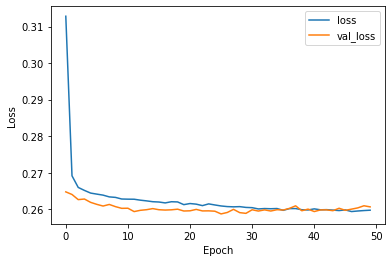

In [161]:
losses[['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

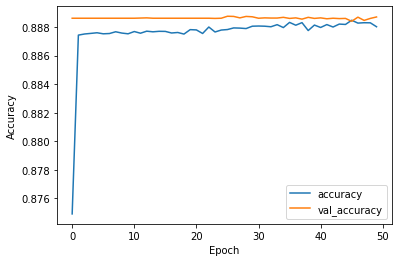

In [163]:
losses[['accuracy', 'val_accuracy']].plot()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [164]:
from sklearn.metrics import classification_report,confusion_matrix

In [165]:
predictions = model.predict_classes(X_test)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [166]:
confusion_matrix(y_test,predictions)

array([[ 6816,  8761],
       [   32, 63397]])

In [167]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61     15577
           1       0.88      1.00      0.94     63429

    accuracy                           0.89     79006
   macro avg       0.94      0.72      0.77     79006
weighted avg       0.90      0.89      0.87     79006



### In conclusion we

Loaded the dataset.

Did Exploratory Data Analysis.

Processed the data, dealt with missing values did one-hot encoding for categorical features and handled outliers.

Created and trained a 5-layer deep artificial neural network to predict the loan status.

The model performed well with accuracy of 0.89, precission of 0.88, recall of 1 and f1-score of 0.94.